Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            

/tmp/ipython-input-14-1219868986.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-14-1219868986.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

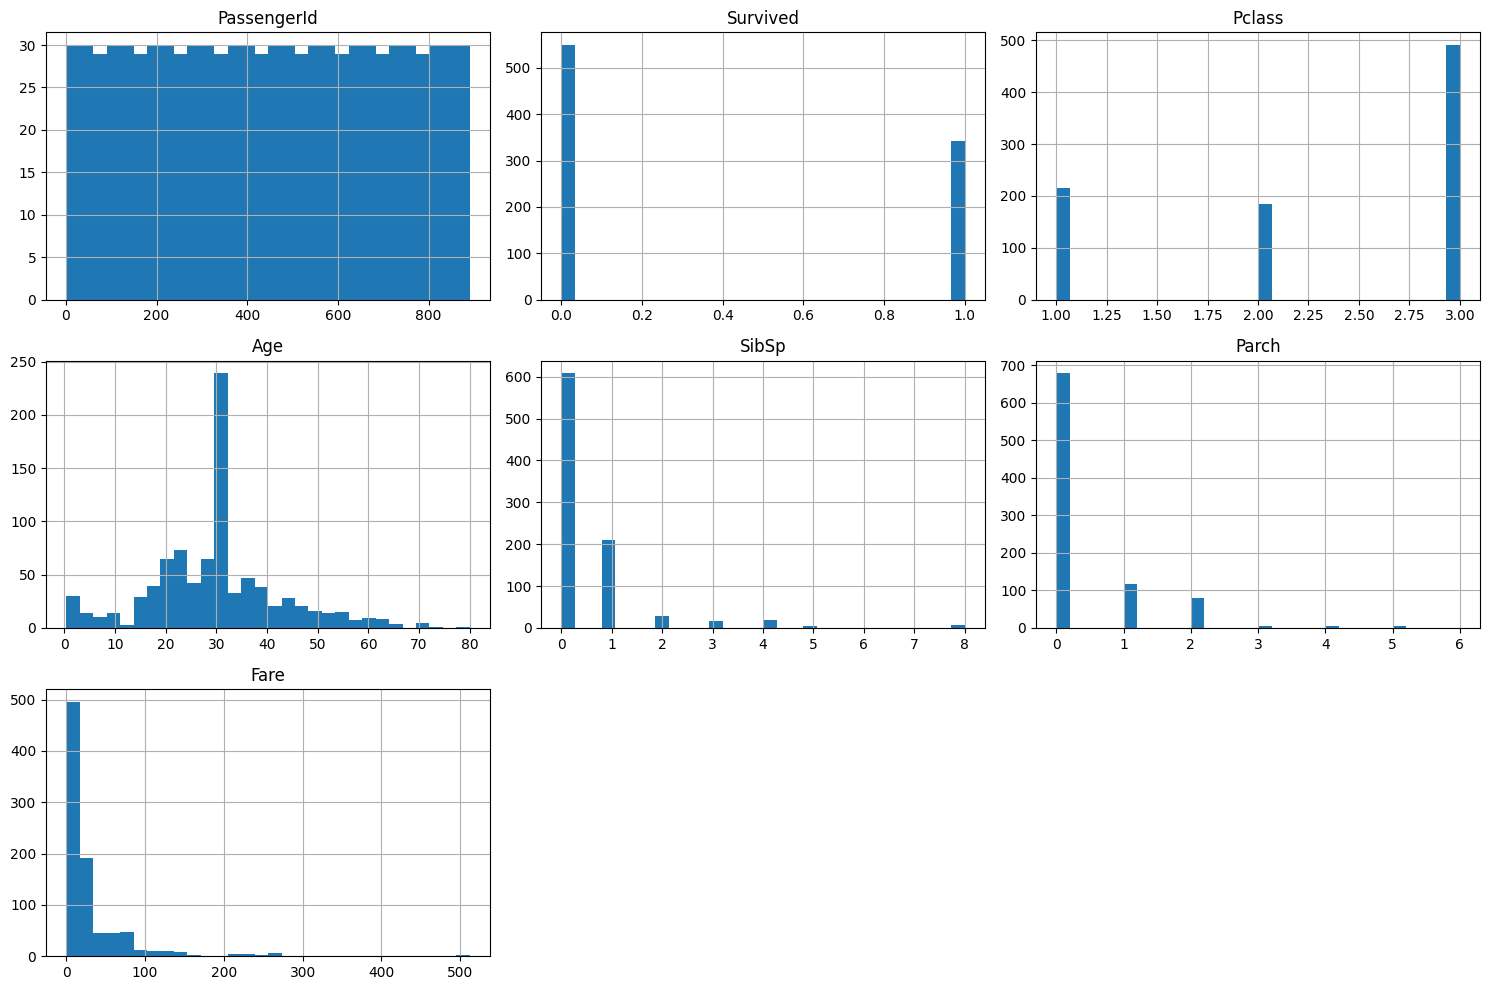


Visualizing categorical column distributions (top 10):


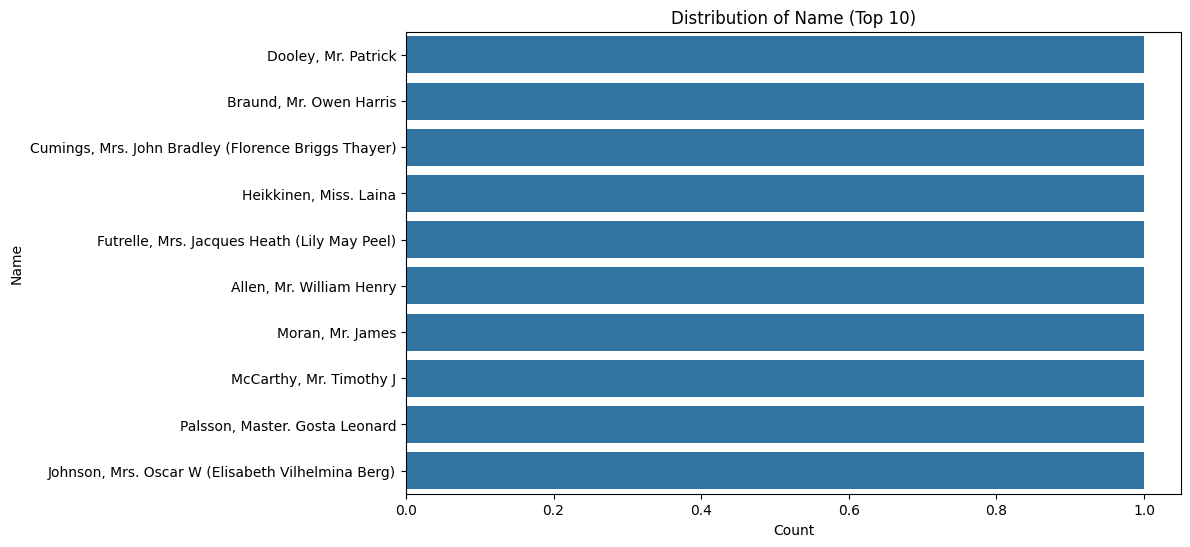

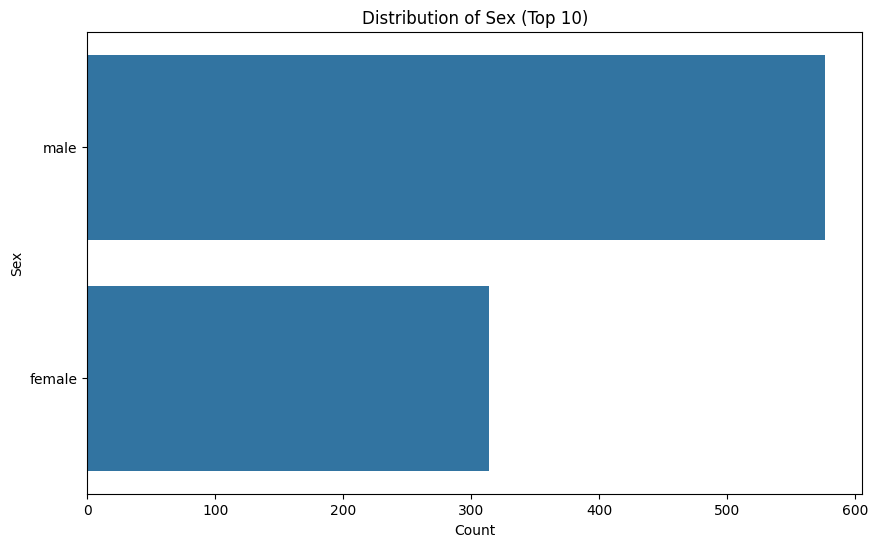

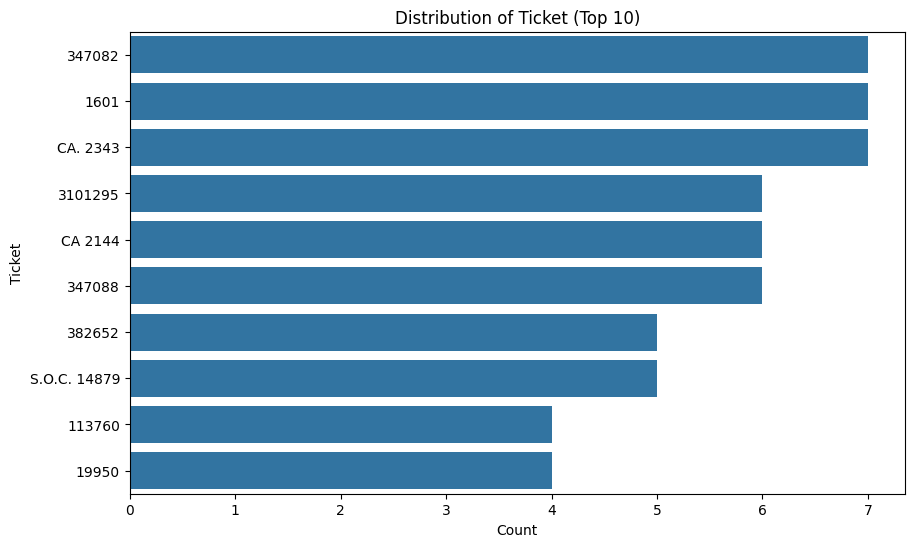

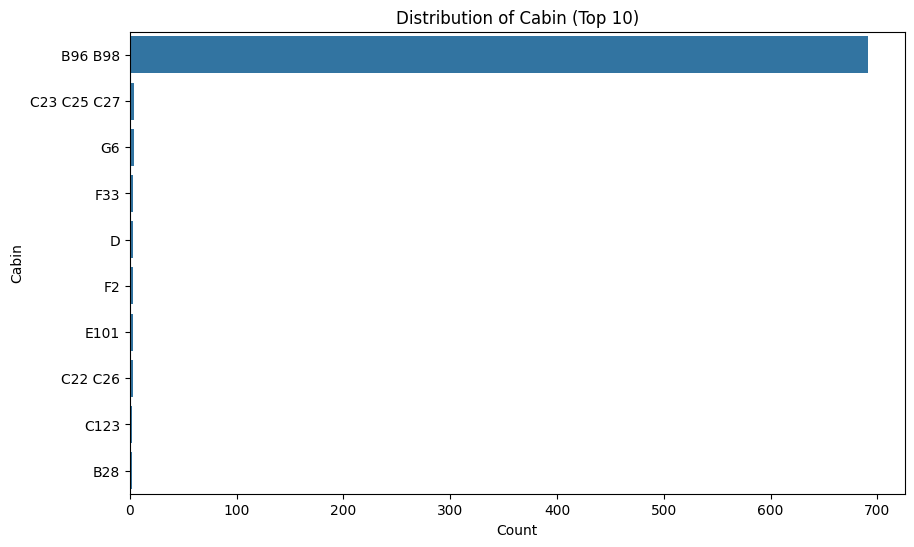

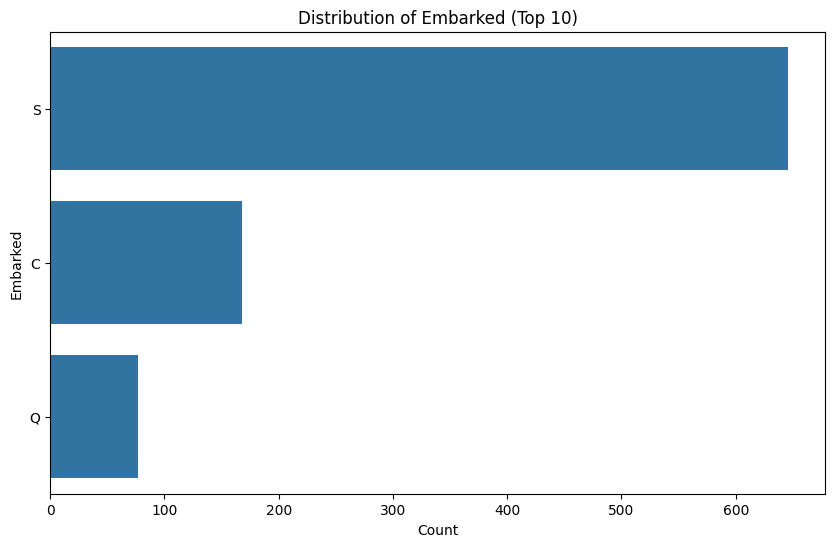


Correlation Matrix (Numerical Features):


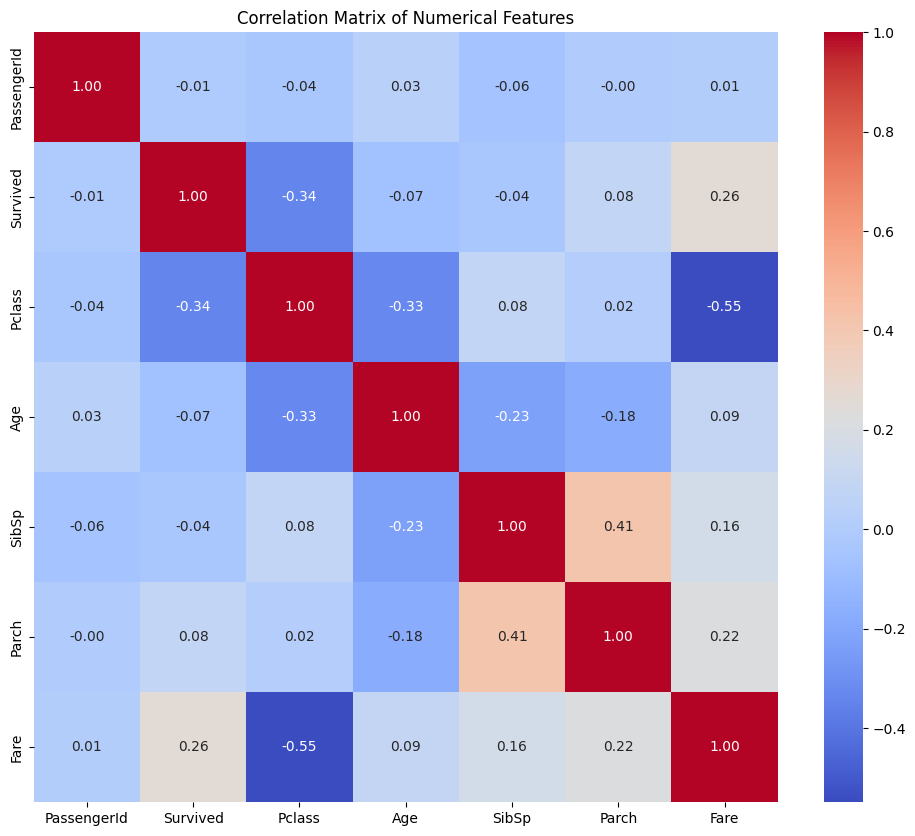


EDA complete.


In [14]:
# prompt: perfrom data cleaning and exploratory data analysis (EDA) on a dataset of you choice  explore the relationships between variable and identify patterns and trends in the data
# train.csv is the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: train.csv not found. Please make sure the file is in the correct directory or upload it.")
    # You might want to upload the file using:
    # from google.colab import files
    # uploaded = files.upload()
    # for fn in uploaded.keys():
    #    print('User uploaded file "{name}" with length {length} bytes'.format(
    #        name=fn, length=len(uploaded[fn])))
    exit() # Exit if the file is not found

# --- Data Cleaning ---

# Display initial info
print("Initial DataFrame Info:")
df.info()
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Handle missing values (Example: Impute with mean for numerical, mode for categorical)
# This is a simple strategy; more sophisticated methods might be needed depending on the data
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Handle duplicates (if any)
print(f"\nNumber of duplicate rows before cleaning: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

# --- Exploratory Data Analysis (EDA) ---

# Basic statistics
print("\nBasic Statistics:")
print(df.describe(include='all'))

# Distribution of target variable (assuming 'target' is the name of your target column)
# Replace 'target' with the actual name of your target column if it's different
if 'target' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='target', data=df)
    plt.title('Distribution of Target Variable')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.show()
else:
    print("\nAssuming no specific 'target' column for this general EDA example.")


# Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 0:
    print("\nVisualizing numerical column distributions:")
    df[numerical_cols].hist(bins=30, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

# Visualize distributions of categorical features (top N categories)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print("\nVisualizing categorical column distributions (top 10):")
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        # Plot top 10 categories for better visualization
        sns.countplot(y=col, data=df, order=df[col].value_counts().nlargest(10).index)
        plt.title(f'Distribution of {col} (Top 10)')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    print("\nCorrelation Matrix (Numerical Features):")
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# Explore relationships between features and target (if target exists and is suitable for these plots)
if 'target' in df.columns:
    print("\nExploring relationships with the target variable:")
    # Example: Box plots for numerical features vs. categorical target
    if df['target'].dtype in ['object', 'category', 'int64'] and len(df['target'].unique()) < 20: # Check if target is categorical-like
        for num_col in numerical_cols:
            if num_col != 'target':
                plt.figure(figsize=(10, 6))
                sns.boxplot(x='target', y=num_col, data=df)
                plt.title(f'{num_col} vs. Target')
                plt.xlabel('Target')
                plt.ylabel(num_col)
                plt.show()

    # Example: Count plots for categorical features vs. target (stacked or grouped)
    if df['target'].dtype in ['object', 'category', 'int64'] and len(df['target'].unique()) < 20:
         for cat_col in categorical_cols:
             if cat_col != 'target':
                 plt.figure(figsize=(12, 7))
                 sns.countplot(x=cat_col, hue='target', data=df, order=df[cat_col].value_counts().nlargest(10).index) # Top 10 categories
                 plt.title(f'{cat_col} vs. Target')
                 plt.xlabel(cat_col)
                 plt.ylabel('Count')
                 plt.xticks(rotation=45, ha='right')
                 plt.tight_layout()
                 plt.show()

# Pairplot for a subset of numerical features (can be computationally expensive for many columns)
# Select a few interesting numerical columns based on the correlation matrix or domain knowledge
# selected_numerical_cols = ['col1', 'col2', 'col3', 'target'] # Replace with actual column names
# if 'target' in df.columns and all(col in df.columns for col in selected_numerical_cols):
#    print("\nGenerating Pairplot (Subset of Numerical Features):")
#    sns.pairplot(df[selected_numerical_cols], hue='target' if 'target' in selected_numerical_cols else None)
#    plt.show()

print("\nEDA complete.")
